In [1]:
import gc
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr

%load_ext autoreload
%autoreload 2

from delay_discounting_mvpa.config_loader import load_config
from delay_discounting_mvpa.fmri_io import load_bold_estimates
from delay_discounting_mvpa.io_utils import get_subids, load_tsv_data, resolve_file

In [2]:
config_file = '/oak/stanford/groups/russpold/data/uh2/aim1/analysis_code/delay_discounting_mvpa/configs/config.yaml'
cfg = load_config(config_file)

subids_txt_file = Path('../good_subjects/good_subids.txt')
with open(subids_txt_file, 'r') as f:
    subids = [line.strip() for line in f if line.strip()]

In [3]:
all_mask_files = []

for subid in subids:
    mask_file = resolve_file(cfg, subid, 'mask')
    all_mask_files.append(mask_file)


In [4]:
from nilearn.masking import intersect_masks
from nilearn.plotting import plot_roi
import matplotlib.pyplot as plt

In [5]:
group_mask = intersect_masks(all_mask_files, threshold=0.95, connected=False)


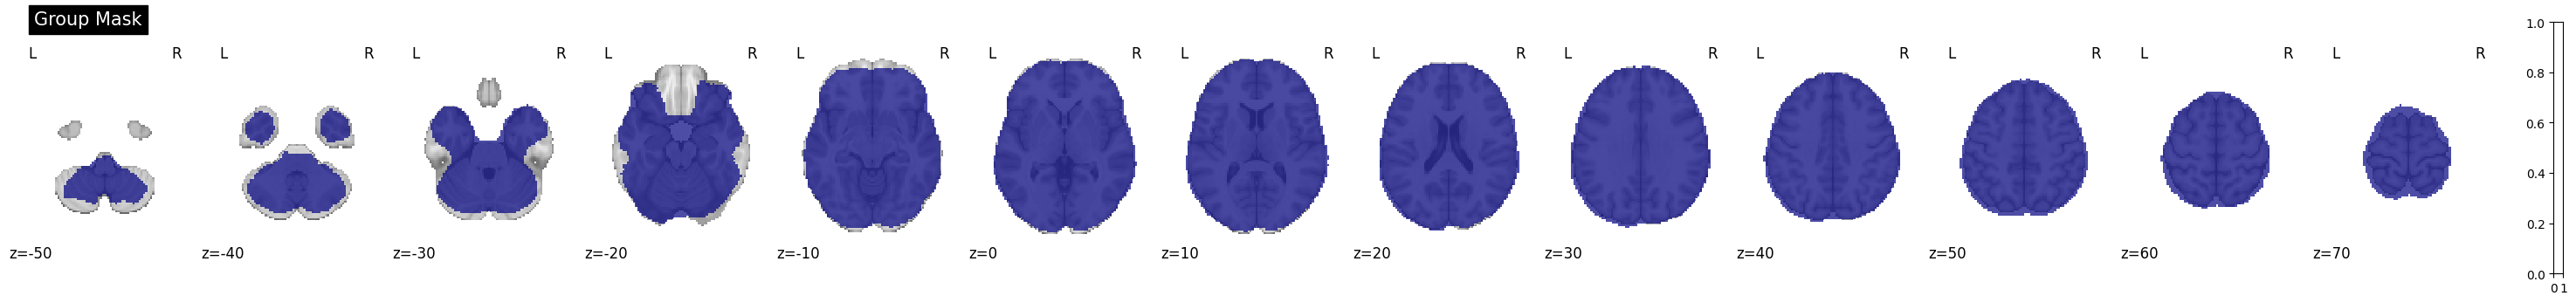

In [6]:
z_slices = list(range(-50, 71, 10))  # from -50 to 70 in increments of 10

# Plot
plot_roi(group_mask, display_mode='z', cut_coords=z_slices, title='Group Mask')
plt.show()

In [12]:
mask_outfile = cfg.masks_dir / 'brain_mask.nii.gz'

group_mask.to_filename(mask_outfile)